In [45]:
import mysql.connector
import pandas as pd

config = {
  'user': 'remote',
  'password': 'joyfay2013',
  'host': '54.223.102.66',
  'database': 'vnpy',
  'raise_on_warnings': True
}

cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()
query = ("SELECT time,open_price,close_price,volume FROM ib_bar_data WHERE symbol='BZ20211230'")
df=pd.read_sql(query,cnx)
cnx.close()
df.head()

,time,open_price,close_price,volume
0,2021-08-26 13:32:00,68.96,68.99,46.0
1,2021-08-26 13:33:00,68.99,68.99,95.0
2,2021-08-26 13:34:00,68.99,68.93,133.0
3,2021-08-26 13:35:00,68.93,68.93,111.0
4,2021-08-26 13:36:00,68.98,68.99,214.0


/Users/junwei1/opt/anaconda3/envs/research/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


<AxesSubplot:xlabel='time'>

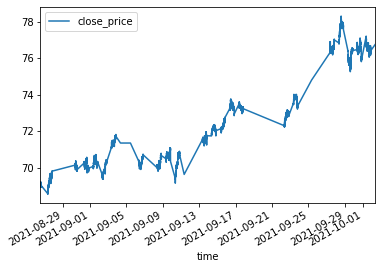

In [46]:
import matplotlib.pyplot as plt
import datetime as dt
df.plot.line(x='time',y='close_price')

In [47]:
def get_volume_bars(data: pd.DataFrame, m: int = None):
    #if volume amounts to more than m, sample a bar
    ts, idx = 0, []
    for i, row in data.iterrows():
        volume=row['volume']
        ts += volume
        if ts >= m:
            ts = 0; idx.append(i)
            continue
    return data.iloc[idx]

15464
31


/Users/junwei1/opt/anaconda3/envs/research/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


<AxesSubplot:xlabel='time'>

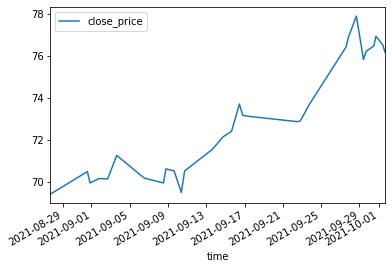

In [42]:
print(len(df))
volume_bars=get_volume_bars(df,100000)

print(len(volume_bars))
#volume_bars
volume_bars.plot.line(x='time',y='close_price')

In [48]:
df['dollar_amt']=0.2*(df['open_price']+df['close_price'])*df['volume']*1000/2
def get_dollar_bars(data: pd.DataFrame, m: int = None):
    #if dollars traded amounts to more than m, sample a bar
    # currently we have only 1 min data that doesn't show dollars amount, I use (open+close)*volume/2 to estimate
    # use 20% as margin requirement, for example, if sc2112 trades at 400 CNY, each position should be 1000*400*20%
    ts, idx = 0, []
    for i, row in data.iterrows():
        volume=row['dollar_amt']
        ts += volume
        if ts >= m:
            ts = 0; idx.append(i)
            continue
    return data.iloc[idx]

3857


/Users/junwei1/opt/anaconda3/envs/research/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


<AxesSubplot:xlabel='time'>

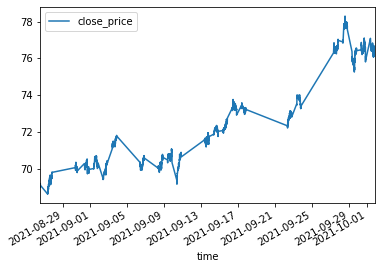

In [44]:
dollar_bars=get_dollar_bars(df,10000000)
print(len(dollar_bars))
dollar_bars.plot.line(x='time',y='close_price')